C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['C:\\Program Files\\Anaconda3\\envs\\tensor\\fonts/gulim.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


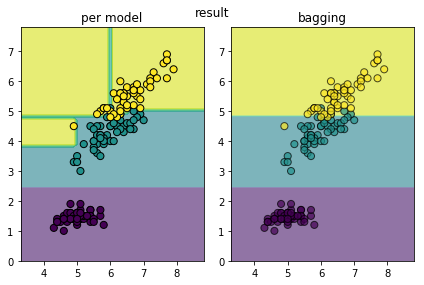

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# 분포
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, edgecolors="k")
plt.title("per model")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7, s=50, edgecolors="k") # 컬러 구분, 투명도, 크기,둘레색
plt.title("bagging")
plt.suptitle("result")
plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['C:\\Program Files\\Anaconda3\\envs\\tensor\\fonts/gulim.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


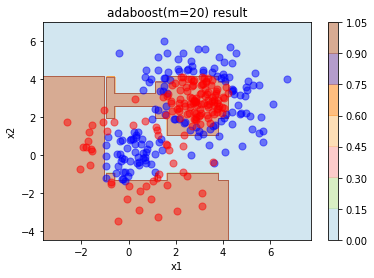

In [86]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1) #2차원 분포생성
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1)) # 역수로 데이터 만들어줌 for 그림

class MyAdaBoostClassifier(AdaBoostClassifier):
    
    def __init__(self,
                 base_estimator=None, # decision tree
                 n_estimators=50, # nun of trees
                 learning_rate=1.,
                 algorithm='SAMME.R', # 계산 알고리즘
                 random_state=None):

        super(MyAdaBoostClassifier, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state)
        self.sample_weight = [None] * n_estimators
        
    def _boost(self, iboost, X, y, sample_weight, random_state):
        sample_weight, estimator_weight, estimator_error = \
        super(MyAdaBoostClassifier, self)._boost(iboost, X, y, sample_weight, random_state)
        self.sample_weight[iboost] = sample_weight.copy()
        return sample_weight, estimator_weight, estimator_error
    
model_ada = MyAdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=20)
model_ada.fit(X, y)

def plot_result(model,title=None, legend=False, s=50):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    cs = plt.contourf(xx1, xx2, Y, cmap=plt.cm.Paired, alpha=0.5)
    for i, n, c in zip(range(2), "01", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, s=s, alpha=0.5, label="Class %s" % n)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend:
        plt.legend()
    plt.grid(False)

plot_result(model_ada, "adaboost(m=20) result")


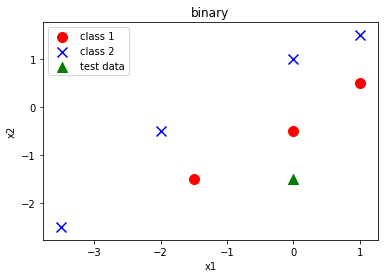

C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\envs\tensor\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['C:\\Program Files\\Anaconda3\\envs\\tensor\\fonts/gulim.ttc'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


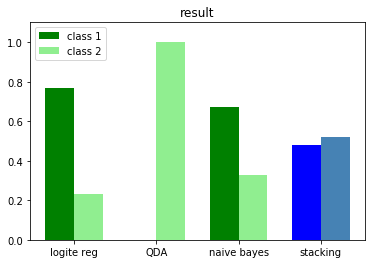

In [93]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]

plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="class 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="class 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="test data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("binary")
plt.legend()
plt.show()




from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier  #스택킹

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft')

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas] # 각모델이 계산한 class1일 확률
class2_1 = [pr[0, 1] for pr in probas] # 각모델이 계산한 class2일 확률

index = np.arange(4) # index
width = 0.35  # bar width
p1 = plt.bar(index, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(index + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
# 각 모델의 확률 bar
p3 = plt.bar(index, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(index + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')
# stacking의 확률 bar

plt.xticks(ind + 0.5 * width, ['logite reg', 'QDA', 'naive bayes', 'stacking'])
plt.ylim([0, 1.1])
plt.title('result')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()


In [102]:
class1_1[-1],

(0.48054165512563163,)